# Analysis of apartments rent in Dubai, UAE
 For **DIFC** and **Downtown** area

## Preparations

All data was scraped from Bayut website on August 9 and saved as .CSV file.  
First downloading .CSV file from Google Drive with command `! gdown`

In [1]:
! gdown 1EMlXkq1MI4HqYwbcvTl93bKZ2BvRqDCy

Downloading...
From: https://drive.google.com/uc?id=1EMlXkq1MI4HqYwbcvTl93bKZ2BvRqDCy
To: /content/bayut-dubai-difc-downtown.csv
100% 8.85M/8.85M [00:00<00:00, 229MB/s]


Importing all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading .CSV file with pandas using python engine and checking first 5 rows of data

In [3]:
data = pd.read_csv('bayut-dubai-difc-downtown.csv', engine='python')

In [4]:
data.head(5)

,web-scraper-order,web-scraper-start-url,pagination,apartmet-link,apartmet-link-href,building,price,rent-frequency,address,beds,...,reference-no,date-added,balcony-size-sqft,parking,building-info-name,building-info-floors,building-info-year,building-info-area-sqft,furnishing,features-amenities
0,1660037380-2176,https://www.bayut.com/to-rent/apartments/dubai...,https://www.bayut.com/to-rent/apartments/dubai...,NaN,https://www.bayut.com/property/details-5975062...,NaN,"190,000",Yearly,"The Address The Blvd, Downtown Dubai, Dubai",1 Bed,...,Bayut - BHM-R-556121,23 May 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Centrally Air-Conditioned
1,1660040273-2805,https://www.bayut.com/to-rent/apartments/dubai...,https://www.bayut.com/to-rent/apartments/dubai...,NaN,https://www.bayut.com/property/details-5937929...,NaN,"165,000",Yearly,"Downtown Views, Downtown Dubai, Dubai",2 Beds,...,Bayut - MK-R-5701-07-P,10 May 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Parking Spaces: 1
2,1660036840-2061,https://www.bayut.com/to-rent/apartments/dubai...,https://www.bayut.com/to-rent/apartments/dubai...,NaN,https://www.bayut.com/property/details-5577993...,NaN,"290,000",Yearly,"BLVD Heights Tower 2, BLVD Heights, Downtown D...",2 Beds,...,Bayut - 879-Ap-R-1951,4 July 2022,NaN,NaN,NaN,NaN,NaN,NaN,Unfurnished,Swimming Pool
3,1660042132-3219,https://www.bayut.com/to-rent/apartments/dubai...,https://www.bayut.com/to-rent/apartments/dubai...,NaN,https://www.bayut.com/property/details-5942993...,NaN,"185,000",Yearly,"The Address The Blvd, Downtown Dubai, Dubai",1 Bed,...,Bayut - BHM-R-555721,12 May 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Centrally Air-Conditioned
4,1660045614-3922,https://www.bayut.com/to-rent/apartments/dubai...,https://www.bayut.com/to-rent/apartments/dubai...,NaN,https://www.bayut.com/property/details-6196723...,NaN,"130,000",Yearly,"Downtown Views, Downtown Dubai, Dubai",1 Bed,...,Bayut - MCC-R-5685,3 August 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,NaN


There's a few columns that is not valuable for future analysis such as links, IDs, rent frequency as its only contains annual rent options.  
Let's drop those columns.

In [5]:
data.drop(['apartmet-link-href','rent-frequency','web-scraper-order','web-scraper-start-url','pagination','apartmet-link', 'building'], axis=1, inplace=True)

In [6]:
# for col in data.columns:
#     print(col)
data.columns

Index(['price', 'address', 'beds', 'baths', 'area-sqft', 'description-title',
       'description', 'reference-no', 'date-added', 'balcony-size-sqft',
       'parking', 'building-info-name', 'building-info-floors',
       'building-info-year', 'building-info-area-sqft', 'furnishing',
       'features-amenities'],
      dtype='object')

First view on data info if there are anything odd or interesting insights

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    4824 non-null   object 
 1   address                  4824 non-null   object 
 2   beds                     4824 non-null   object 
 3   baths                    4802 non-null   object 
 4   area-sqft                4824 non-null   object 
 5   description-title        4824 non-null   object 
 6   description              4824 non-null   object 
 7   reference-no             4824 non-null   object 
 8   date-added               4824 non-null   object 
 9   balcony-size-sqft        1069 non-null   object 
 10  parking                  1188 non-null   object 
 11  building-info-name       1184 non-null   object 
 12  building-info-floors     1184 non-null   float64
 13  building-info-year       1184 non-null   float64
 14  building-info-area-sqft 

Price is an object, that should be changed as number of beds, baths and some othere data.  
Some data are missing, we will deal with that later

In [8]:
data.sample()

,price,address,beds,baths,area-sqft,description-title,description,reference-no,date-added,balcony-size-sqft,parking,building-info-name,building-info-floors,building-info-year,building-info-area-sqft,furnishing,features-amenities
1084,"98,000","29 Boulevard 1, 29 Boulevard, Downtown Dubai, ...",1 Bed,2 Baths,877 sqft,Burj khalifa community || Fully Furnished 1BHK...,About Spot Light Real Estate Broker\n\n\nWe ar...,Bayut - SF-29B-98,25 July 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Furnished


## Data Preprocessing

### Price column

For column with price converting it to data type int, but first removing comma.

In [9]:
data['price'] = data['price'].str.replace(',','').astype(float).astype(int)
data['price'].sample(5)

2729    129990
4169    320000
1291    300000
879     320000
4535    205000
Name: price, dtype: int64

### Bedrooms column

For column with number of bedrooms, let's see how many unique values are there and then replace it with a number, if that is a studio then replace it with 0.

In [10]:
data['beds'].unique()

array(['1 Bed', '2 Beds', 'Studio', '3 Beds', '4 Beds', '5 Beds'],
      dtype=object)

In [11]:
data['beds'] = data['beds'].replace(
    {'Studio': 0,
     '1 Bed': 1,
     '2 Beds': 2,
     '3 Beds': 3,
     '4 Beds': 4,
     '5 Beds': 5,
    }
  )


### Address column

For column with address, it has name of the city, area, bulding name or even a complecs of buildings name.  
We need it to be separated to diferent columns for future analysis. We can see that a bulding name is always goes first, city is always the last and before city is area name.  
So, let's split the address and save each element to a new column.

In [12]:
data['address_city'] = data['address'].str.split(', ').str[-1]
data['address_area'] = data['address'].str.split(', ').str[-2]
data['address_building'] = data['address'].str.split(', ').str[0]

In [13]:
data[['address', 'address_city', 'address_area', 'address_building']].sample(5)

,address,address_city,address_area,address_building
2161,"South Ridge 2, South Ridge Towers, Downtown Du...",Dubai,Downtown Dubai,South Ridge 2
3994,"Damac Maison Dubai Mall Street, Downtown Dubai...",Dubai,Downtown Dubai,Damac Maison Dubai Mall Street
1947,"The Address Sky View Tower 2, The Address Sky ...",Dubai,Downtown Dubai,The Address Sky View Tower 2
3746,"The Address Residence Fountain Views, Downtown...",Dubai,Downtown Dubai,The Address Residence Fountain Views
2954,"The Address Fountain Views 2, The Address Resi...",Dubai,Downtown Dubai,The Address Fountain Views 2


We no longer needed column with address, let's drop it.

In [14]:
data.drop(['address'], axis=1, inplace=True)

### Bathrooms column

Similar to bedrooms column first checking unique values and then will replace it with numbers to have it as an int data type. Also there are 22 missing values.

In [15]:
data['baths'].unique()

array(['2 Baths', '3 Baths', '1 Bath', '5 Baths', '4 Baths', nan,
       '6 Baths'], dtype=object)

In [16]:
data[data['baths'].isnull()]

,price,beds,baths,area-sqft,description-title,description,reference-no,date-added,balcony-size-sqft,parking,building-info-name,building-info-floors,building-info-year,building-info-area-sqft,furnishing,features-amenities,address_city,address_area,address_building
156,250000,3,NaN,"1,610 sqft",LARGE 3 BEDROOM APARTMENT|| FULLY FURNISHED|| ...,GREETINGS FROM LEADING PROPERTIES\nLEADING rea...,Bayut - 3305-Ap-R-0067,16 June 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Shared Kitchen,Dubai,Downtown Dubai,Elite Downtown Residence
192,88000,2,NaN,"1,490 sqft",Hot Deal Bright 2 BR For rent in Najoom tower,Burj Al Nujoom A stylish development within Do...,Bayut - ab_najoom_2,29 March 2022,NaN,NaN,NaN,NaN,NaN,NaN,Unfurnished,Jacuzzi,Dubai,Downtown Dubai,Burj Al Nujoom
204,109500,1,NaN,922 sqft,Available Now | Brand New | High Floor,LuxFolio Real Estate are delighted to present ...,Bayut - LXF-R-11388,26 July 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Balcony or Terrace,Dubai,Downtown Dubai,Boulevard Point
253,50000,0,NaN,475 sqft,Fully Furnished Studio | Call now,DNL Properties are pleased to offer you an ama...,Bayut - DNL-R-5797,8 August 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,NaN,Dubai,Downtown Dubai,Burj Al Nujoom
593,310000,2,NaN,"1,336 sqft",Best Priced|High Floor|Burj Khalifa View,Engel & Voelkers proudly offers for rent this ...,Bayut - EVO-R-23435,1 August 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Parking Spaces,Dubai,Downtown Dubai,The Address Fountain Views 1
613,310000,2,NaN,"1,336 sqft",Best Priced|High Floor|Burj Khalifa View,Engel & Voelkers proudly offers for rent this ...,Bayut - EVO-R-23435,1 August 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Balcony or Terrace,Dubai,Downtown Dubai,The Address Fountain Views 1
975,310000,2,NaN,"1,336 sqft",Best Priced|High Floor|Burj Khalifa View,Engel & Voelkers proudly offers for rent this ...,Bayut - EVO-R-23435,1 August 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Furnished,Dubai,Downtown Dubai,The Address Fountain Views 1
1145,275000,2,NaN,"1,343 sqft",Burj Khalifa View | Furnished and Spacious Uni...,A&B Realty Real Estate is pleased to offer thi...,Bayut - OR-FV1-2br,10 May 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Furnished,Dubai,Downtown Dubai,The Address Fountain Views 1
1205,109500,1,NaN,922 sqft,Available Now | Brand New | High Floor,LuxFolio Real Estate are delighted to present ...,Bayut - LXF-R-11388,26 July 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swimming Pool,Dubai,Downtown Dubai,Boulevard Point
1269,275000,2,NaN,"1,343 sqft",Burj Khalifa View | Furnished and Spacious Uni...,A&B Realty Real Estate is pleased to offer thi...,Bayut - OR-FV1-2br,10 May 2022,NaN,NaN,NaN,NaN,NaN,NaN,Furnished,Balcony or Terrace,Dubai,Downtown Dubai,The Address Fountain Views 1


As we can see there's many apartments with huge area and a few bedrooms, at least it should have 1 bathrom.  
However, if we will fill mising values with 1 it might confuse our next analysis.  As it is only 22 missings we can just drop it. 
But, maybe later will comback to this and try to extract info from other columns such as description column.

On the next step will drop missing values, replace strings to numbers and check unique values.

In [17]:
data.dropna(subset=['baths'], inplace=True)

In [18]:
data['baths'] = data['baths'].replace(
    {'1 Bath': 1,
     '2 Baths': 2,
     '3 Baths': 3,
     '4 Baths': 4,
     '5 Baths': 5,
     '6 Baths': 6,
    }
  ).astype(int)

In [19]:
data['baths'].unique()

array([2, 3, 1, 5, 4, 6])

### Area (sqft) column

Replace commas and sqft then convert to int data type. Check first 5 rows.

In [20]:
data['area-sqft'] = (
    data['area-sqft']
    .str.replace('sqft','')
    .str.replace(',','')
    .astype(float)
    .astype(int)
    )
data['area-sqft'].head(5)

0     905
1    1250
2    1759
3     905
4     861
Name: area-sqft, dtype: int64

### Date column

Converting column with date to datetime format

In [21]:
data['date-added'] = pd.to_datetime(data['date-added'], format = "%d %B %Y")

Adding four new columns with year, month, day and weekday

In [22]:
data['year'] = pd.DatetimeIndex(data['date-added']).year 
data['month'] = pd.DatetimeIndex(data['date-added']).month 
data['day'] = pd.DatetimeIndex(data['date-added']).day
data['weekday'] = pd.DatetimeIndex(data['date-added']).weekday

In [23]:
data[['date-added', 'year', 'day', 'month', 'weekday']].head(5)

,date-added,year,day,month,weekday
0,2022-05-23,2022,23,5,0
1,2022-05-10,2022,10,5,1
2,2022-07-04,2022,4,7,0
3,2022-05-12,2022,12,5,3
4,2022-08-03,2022,3,8,2


### Furnishing column

In [24]:
data['furnishing'].unique()

array(['Furnished', 'Unfurnished', nan], dtype=object)

In [25]:
data['furnishing'].value_counts().sum()

3287

## Exploratory Data Analysis (EDA)

Defining some functions for future use in analysis

In [26]:
def whiskers_limits(series):
    q1 = np.percentile(series, 25)  # Q1
    q2 = np.percentile(series, 50)  # Q2 (Median)
    q3 = np.percentile(series, 75)  # Q3
    whisker_maximum = round(q3 + ((q3 - q1) * 1.5), 2) # “maximum”: Q3 + 1.5 * IQR 
    whisker_minimum = round(q1 - ((q3 - q1) / 1.5), 2) # “minimum”: Q1 - 1.5 * IQR
    above_whisker_maximum = data.query('@series > @whisker_maximum')[series.name].count()
    total_amount = data[series.name].count()
    
    print(f"{whisker_minimum} - Minimum value for left 'whisker'\n"
          f"{whisker_maximum} - Max value for right 'whisker',\n"
          f"{above_whisker_maximum} (or {round(above_whisker_maximum / total_amount * 100, 2)}%)"
          f" of {total_amount} - N elements after the right 'whisker'")

### Price

Let's see how prices vary for all listings

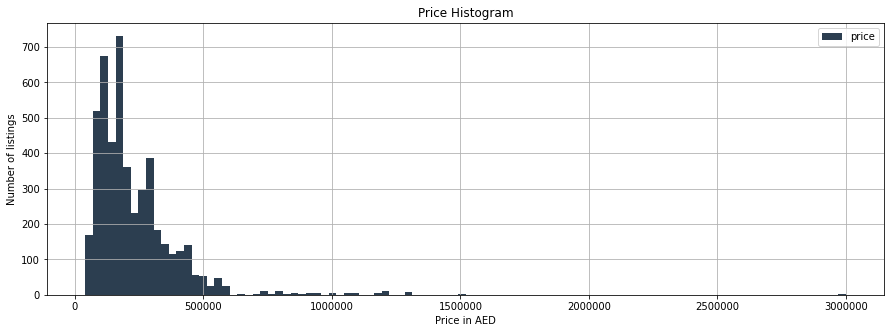

In [27]:
data['price'].plot(
    kind = 'hist',
    bins = 100,
    # range = (0, 25_000_000),
    title = "Price Histogram",
    figsize = (15, 5),
    grid = True,
    legend = True,
    color = '#2c3e50',
)
plt.ylabel('Number of listings')
plt.xlabel('Price in AED')
plt.ticklabel_format(axis='x', style='plain')
# plt.xticks(np.arange(0, 600_000, 10_000))
plt.show()

We can see outliers messing all data starting from price 500,000 and up. Most likely it's huge apartment with many rooms and more luxurious.  
We would need to look into more common range of prices.

In [28]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [29]:
data['price'].describe()

count      4802.00
mean     228229.83
std      171535.69
min       40000.00
25%      120000.00
50%      180000.00
75%      295000.00
max     3000000.00
Name: price, dtype: float64

Using method describe it's easy to see that all prices start as minimum 40,000. Enormous difference between third quartile and max value.

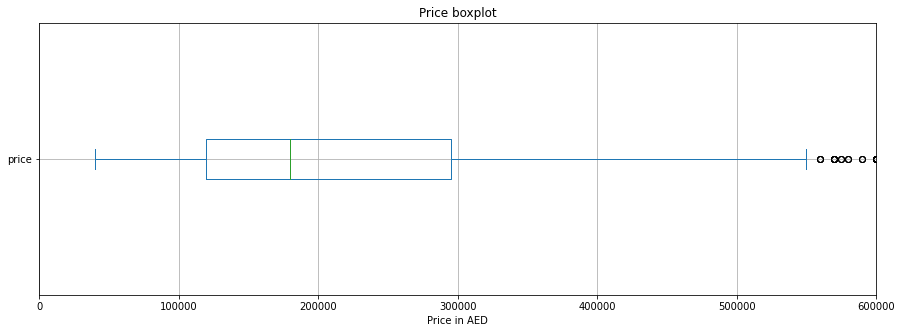

In [30]:
data['price'].plot(
    kind='box',
    title = "Price boxplot",
    figsize = (15, 5),
    grid = True,
    vert = False,
)
plt.xlim(0, 600_000)
plt.xlabel('Price in AED')
plt.show()

In [31]:
whiskers_limits(data['price'])

3333.33 - Minimum value for left 'whisker'
557500.0 - Max value for right 'whisker',
126 (or 2.62%) of 4802 - N elements after the right 'whisker'


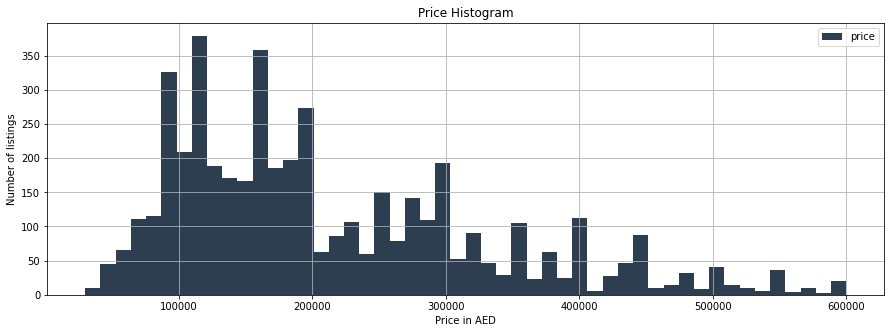

In [32]:
data['price'].plot(
    kind = 'hist',
    bins = 50,
    range = (30_000, 600_000),
    title = "Price Histogram",
    figsize = (15, 5),
    grid = True,
    legend = True,
    color = '#2c3e50',
)
plt.ylabel('Number of listings')
plt.xlabel('Price in AED')
plt.ticklabel_format(axis='x', style='plain')
# plt.xticks(np.arange(30_000, 600_000, 10_000))
plt.show()

### Number of bedrooms

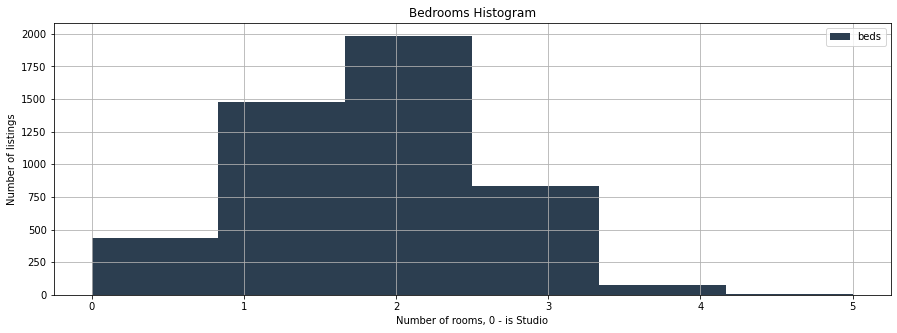

In [33]:
data['beds'].plot(
    kind = 'hist',
    title = "Bedrooms Histogram",
    bins = 6,
    figsize = (15, 5),
    grid = True,
    legend = True,
    color = '#2c3e50',
)
plt.ylabel('Number of listings')
plt.xlabel('Number of rooms, 0 - is Studio')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [34]:
data['beds'].value_counts()

2    1983
1    1474
3     832
0     435
4      75
5       3
Name: beds, dtype: int64

More listings of two bedroom apartemnts followed by one bedroom

#### One bedroom apartments (1BDR)

In [35]:
data_1BDR = data.query('beds == 1')

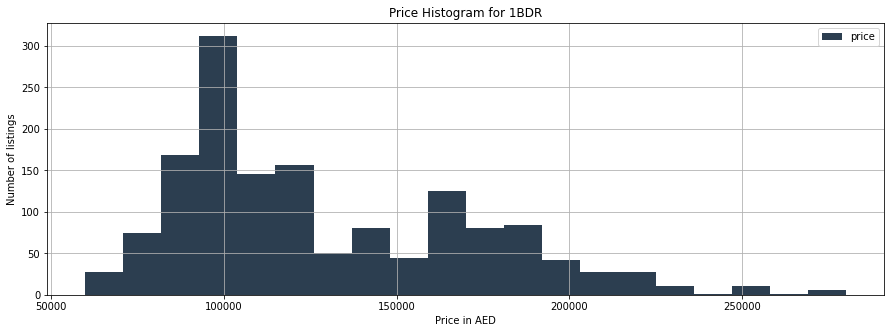

In [36]:
data_1BDR['price'].plot(
    kind = 'hist',
    bins = 20,
    # range = (30_000, 600_000),
    title = "Price Histogram for 1BDR",
    figsize = (15, 5),
    grid = True,
    legend = True,
    color = '#2c3e50',
)
plt.ylabel('Number of listings')
plt.xlabel('Price in AED')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [37]:
data_1BDR['price'].describe()

count     1474.00
mean    128599.18
std      42612.28
min      59998.00
25%      95000.00
50%     115000.00
75%     160000.00
max     280000.00
Name: price, dtype: float64

In [38]:
data_1BDR[['price', 'area-sqft', 'baths']].corr()

,price,area-sqft,baths
price,1.00,0.05,0.07
area-sqft,0.05,1.00,0.21
baths,0.07,0.21,1.00


### Area 

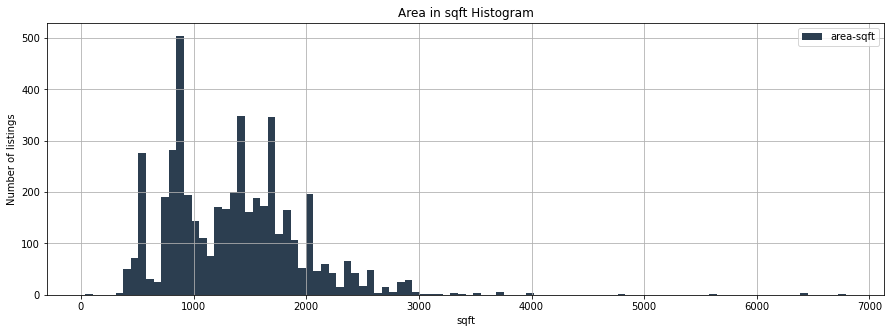

In [39]:
data['area-sqft'].plot(
    kind = 'hist',
    bins = 100,
    # range = (0, 25_000_000),
    title = "Area in sqft Histogram",
    figsize = (15, 5),
    grid = True,
    legend = True,
    color = '#2c3e50',
)
plt.ylabel('Number of listings')
plt.xlabel('sqft')
plt.ticklabel_format(axis='x', style='plain')
# plt.xticks(np.arange(0, 600_000, 10_000))
plt.show()